In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv',usecols=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch',
'Ticket','Fare','Cabin','Embarked'])

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By the count we can clearly see that there are missing values in age columns

In [4]:
data['Age']=data.replace('Age'==['NaN'],'28')

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.Cabin=data.Cabin.replace([np.nan],'C123')

In [7]:
data.Embarked=data.Embarked.replace([np.nan],'S')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label=LabelEncoder()

In [10]:
labelencoding=data.apply(label.fit_transform)

In [11]:
labelencoding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,0,1,0,523,18,55,2
1,1,1,0,190,0,1,1,0,596,207,81,0
2,2,1,2,353,0,2,0,0,669,41,55,2
3,3,1,0,272,0,3,1,0,49,189,55,2
4,4,0,2,15,1,4,0,0,472,43,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,886,0,0,101,85,55,2
887,887,1,0,303,0,887,0,0,14,153,30,2
888,888,0,2,413,0,888,1,2,675,131,55,2
889,889,1,0,81,1,889,0,0,8,153,60,0


In [12]:
# Splitting the data

In [13]:
X=labelencoding.drop('Survived',axis=1)
y=labelencoding.Survived

In [14]:
# Splitting the data

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=355)

In [17]:
# Import tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Building Tree

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

In [25]:
feature_name=X.columns

In [26]:
dot_data=export_graphviz(clf,feature_names=feature_name,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

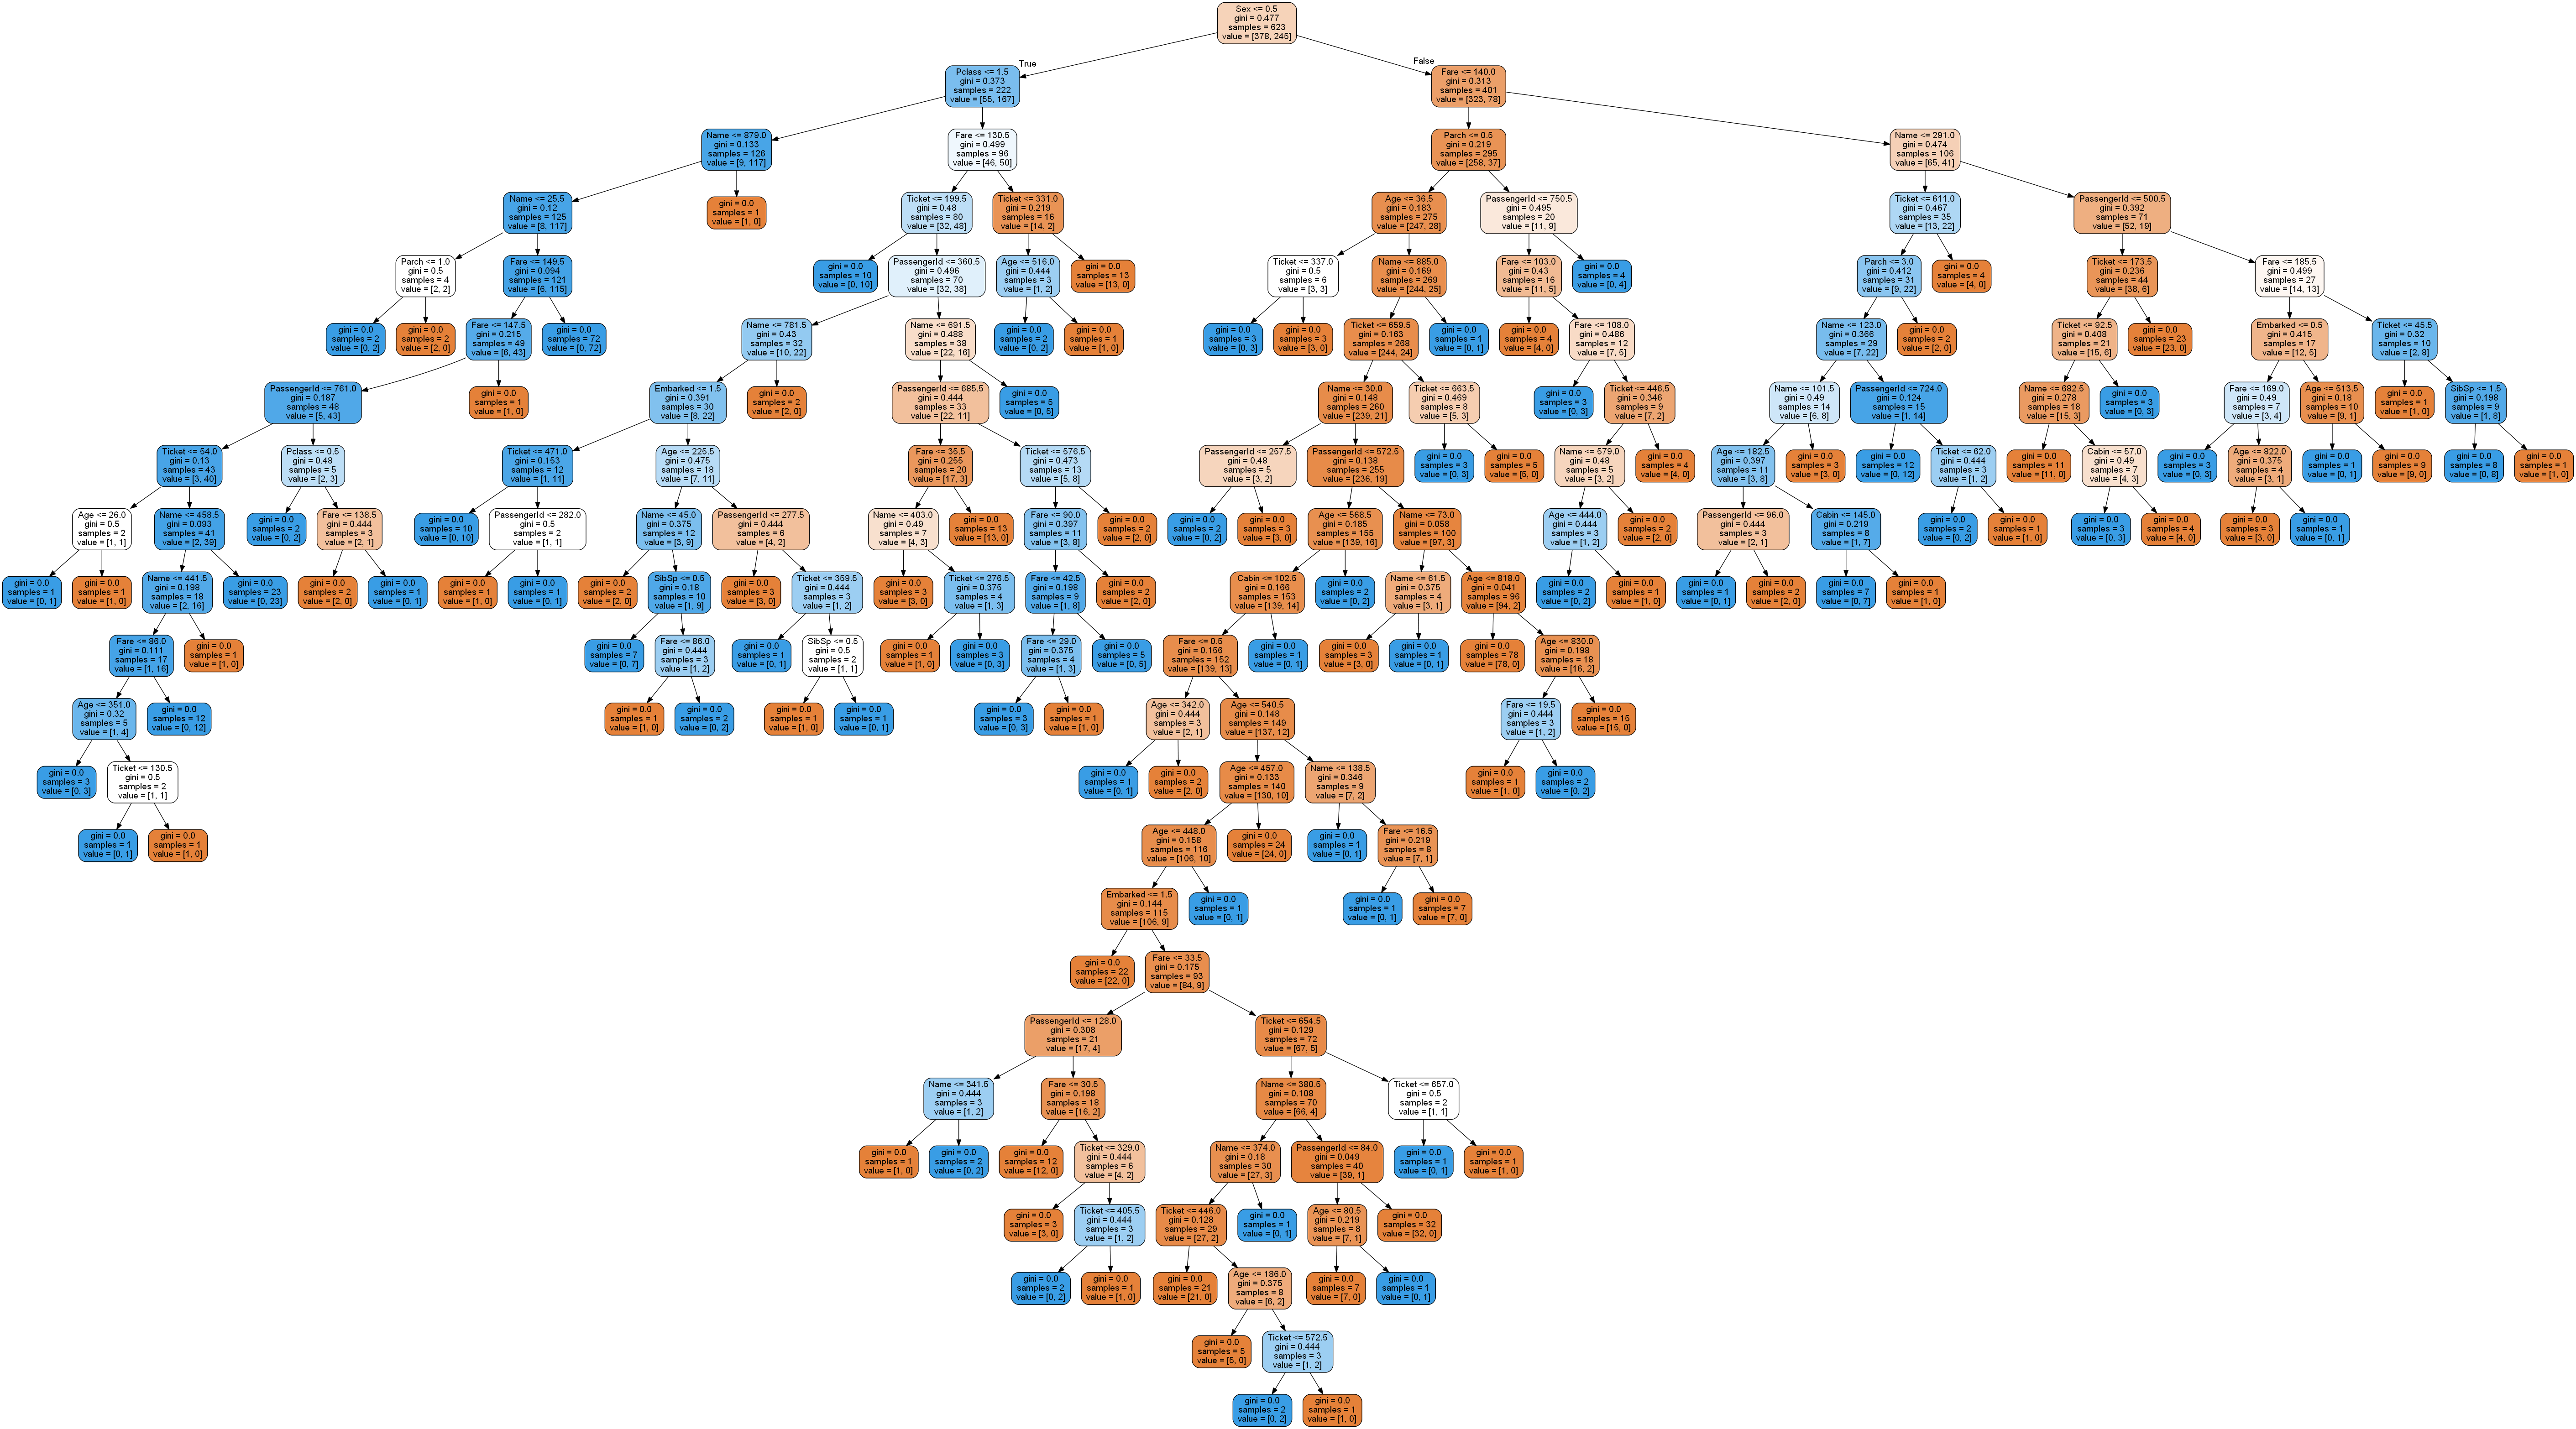

In [27]:
Image(graph.create_png())

In [19]:
clf.score(x_test,y_test)

0.7014925373134329

In [20]:
pred=clf.predict(x_test)

In [29]:
# tuning of parameter using grid search cv
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(1,10,1),
    'min_samples_leaf':range(3,10,1),
    'splitter':['best','random']
}

In [31]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-2)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(3, 10),
                         'splitter': ['best', 'random']})

In [35]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 7, 'splitter': 'random'}


In [36]:
grid_search.best_score_

0.8057290322580645

In [37]:
# Training the model using the the best parameters to check the score.

In [38]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=7,splitter='random')

In [40]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=7, splitter='random')

In [41]:
clf.score(x_test,y_test)

0.7798507462686567

Our score has improved using Grid Search|